In [1]:
import pandas as pd
df = pd.read_csv('car_insurance.csv')
df.head(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


## Dataset
Historical Data on auto claims.The objective is to predict if someone will be filing for an insurance claim in the next 6 months?

In [2]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [57]:
data_sub = df[['policy_tenure','age_of_car','is_claim']]

In [58]:
model = smf.glm("is_claim~policy_tenure+age_of_car",data=data_sub,family=sm.families.Binomial()).fit()

In [59]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               is_claim   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -250.24
Date:                Sun, 30 Apr 2023   Deviance:                       500.48
Time:                        12:52:24   Pearson chi2:                     999.
No. Iterations:                     6   Pseudo R-squ. (CS):           0.006775
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.6755      0.271     -9.880

In [60]:
df[['policy_tenure','age_of_car']]

,policy_tenure,age_of_car
0,0.515874,0.05
1,0.672619,0.02
2,0.841110,0.02
3,0.900277,0.11
4,0.596403,0.11
...,...,...
995,0.483288,0.11
996,0.214615,0.18
997,1.199612,0.13
998,0.147596,0.02


In [16]:
len(df['age_of_car']) 

58592

In [61]:
abline_values

0     -2.762399
1     -2.523367
2     -2.376021
3     -2.630154
4     -2.895892
         ...   
995   -2.994811
996   -3.467667
997   -2.436357
998   -2.982500
999   -2.192106
Length: 1000, dtype: float64

In [62]:
df = df.head(1000)

# Visualising

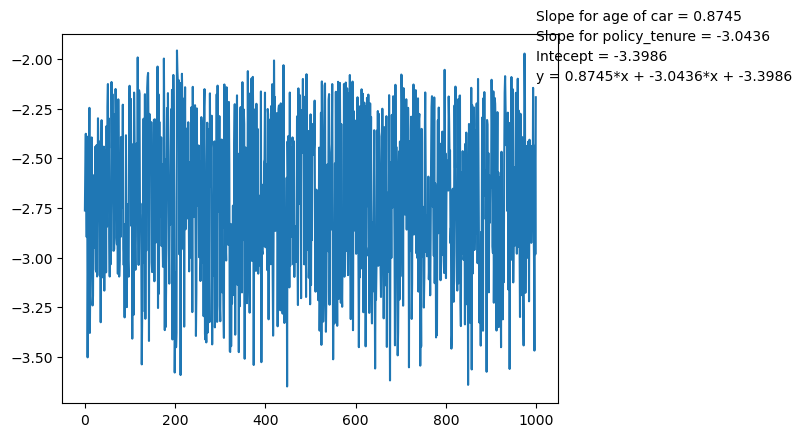

In [64]:
x = [i for i in range(len(df['age_of_car']))]
abline_values = -3.0436 + -3.3986 * df['age_of_car'] + 0.8745 * df['policy_tenure']

plt.plot(x, abline_values)

# Plotting texts for legend
plt.text(1000, -1.75, f'Slope for age of car = {0.8745}', ha='left', va='top')
plt.text(1000, -1.85, f'Slope for policy_tenure = {-3.0436}', ha='left', va='top')
plt.text(1000, -1.95, f'Intecept = {-3.3986}', ha='left', va='top')
plt.text(1000, -2.05, f'y = {0.8745}*x + {-3.0436}*x + {-3.3986}', ha='left', va='top')

plt.show()

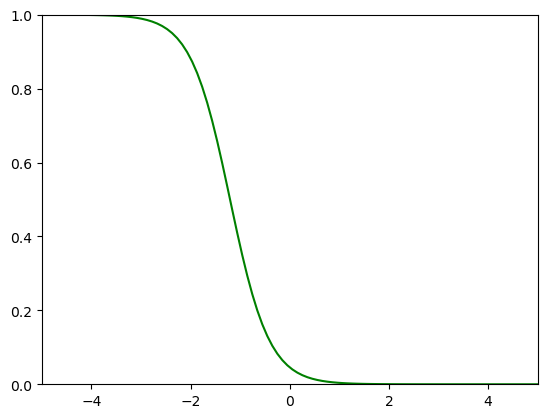

In [65]:
import numpy as np
from scipy.special import expit

x_temp = np.linspace(-5,5,100)
y_sigmoid = x_temp * -3.3986 + x_temp * 0.8745 + -3.0436
    
sigmoid = expit(y_sigmoid)
plt.plot(x_temp,sigmoid.ravel(),c="green", label = "logistic fit")

plt.xlim([-5,5])
plt.ylim([0,1])

plt.show()

In [6]:
model.predict(data_sub)

0        0.059391
1        0.074237
2        0.085021
3        0.067224
4        0.052358
           ...   
58587    0.040122
58588    0.112799
58589    0.100011
58590    0.080303
58591    0.047302
Length: 58592, dtype: float64